In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [4]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
data.isnull().sum() #Пропуски

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

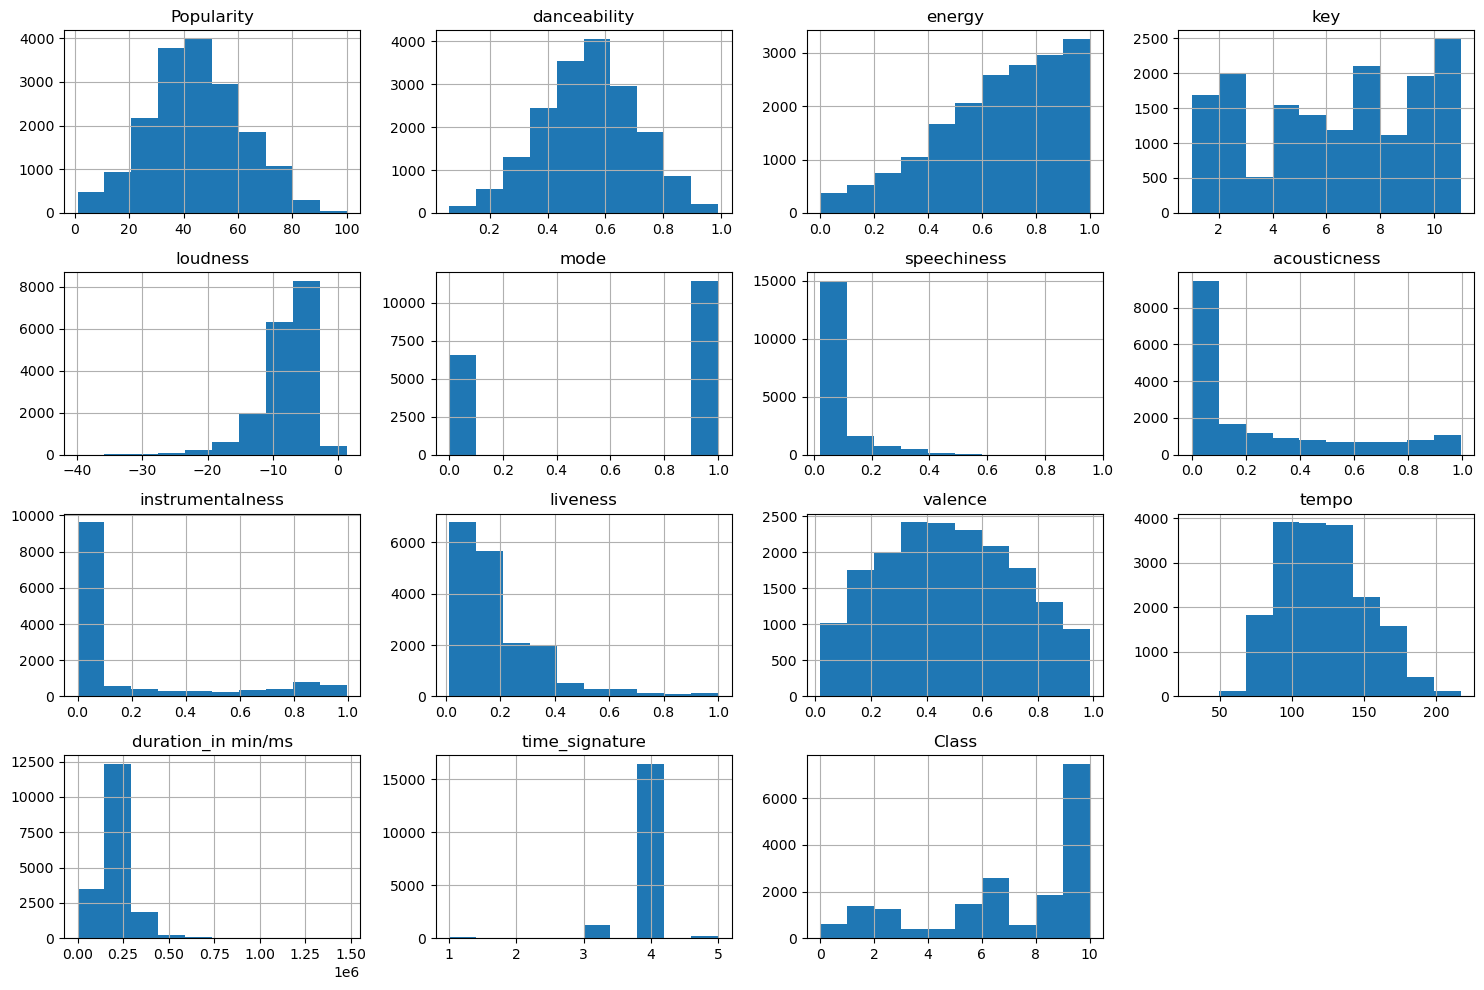

In [6]:
numeric_features = data.select_dtypes(include=['float64', 'int64'])
numeric_features.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

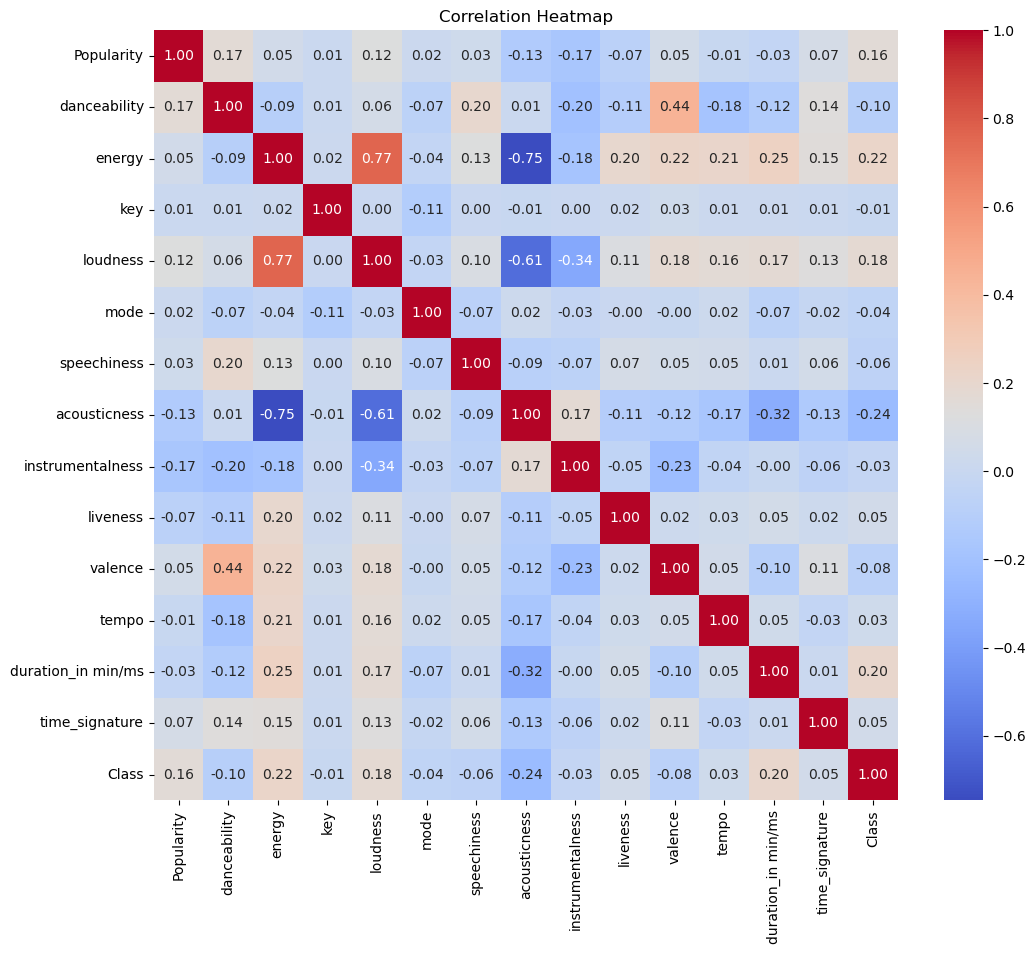

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

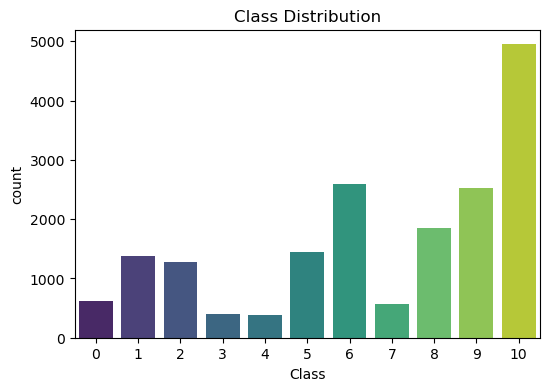

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Class Distribution')
plt.show()

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [9]:
data['Popularity'].fillna(data['Popularity'].mean(), inplace=True)
data['key'].fillna(data['key'].mean(), inplace=True)
data['instrumentalness'].fillna(data['instrumentalness'].mean(), inplace=True)

In [10]:
data.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
label_encoder = LabelEncoder()
data['Artist Name'] = label_encoder.fit_transform(data['Artist Name'].str.lower())
data['Track Name'] = label_encoder.fit_transform(data['Track Name'].str.lower())

In [13]:
scaler = StandardScaler()
data[['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']] = scaler.fit_transform(data[['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']])
data.describe()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.000000,17996.000000,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,17996.000000
mean,4584.148255,7381.789620,4.685257e-17,-4.787482e-16,1.896929e-16,-3.018750e-16,1.833756e-16,2.817385e-16,-9.473541e-17,-7.479014e-17,1.252055e-17,1.444598e-16,-1.268002e-16,-8.677088e-17,-3.872455e-17,3.880944e-15,6.695821
std,2654.550520,4285.049063,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,3.206073
min,0.000000,0.000000,-2.527136e+00,-2.910032e+00,-2.815845e+00,-1.643929e+00,-7.913321e+00,-1.323988e+00,-6.845092e-01,-7.954375e-01,-6.713299e-01,-1.157422e+00,-1.948088e+00,-3.113429e+00,-1.792581e+00,-8.086215e+00,0.000000
25%,2292.750000,3671.750000,-6.686115e-01,-6.702191e-01,-6.533493e-01,-6.481004e-01,-4.019078e-01,-1.323988e+00,-5.373338e-01,-7.815944e-01,-6.702221e-01,-6.197576e-01,-7.877497e-01,-7.778828e-01,-3.072478e-01,2.100655e-01,5.000000
50%,4582.500000,7350.500000,-2.974362e-02,9.423464e-03,1.581499e-01,-2.948244e-16,2.209561e-01,7.552937e-01,-3.865687e-01,-5.333840e-01,-4.828587e-01,-4.219023e-01,-2.168501e-02,-8.649756e-02,7.514814e-02,2.100655e-01,8.000000
75%,6929.000000,11052.250000,6.672032e-01,6.950806e-01,8.379399e-01,6.796705e-01,6.721743e-01,7.552937e-01,3.940238e-02,6.017518e-01,-1.888910e-15,3.883623e-01,7.735235e-01,6.542271e-01,4.620715e-01,2.100655e-01,10.000000
max,9145.000000,14985.000000,3.222675e+00,2.679878e+00,1.432756e+00,1.675499e+00,2.288360e+00,7.552937e-01,1.047330e+01,2.411015e+00,3.094385e+00,5.048954e+00,2.080830e+00,3.205629e+00,1.139823e+01,2.975492e+00,10.000000


In [14]:
X = data.drop(columns=['Class'])
y = data['Class'] 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       143
           1       0.09      0.12      0.10       285
           2       0.33      0.37      0.35       229
           3       0.51      0.62      0.56        73
           4       0.52      0.58      0.55        81
           5       0.55      0.53      0.54       298
           6       0.21      0.21      0.21       503
           7       0.87      0.88      0.87       121
           8       0.49      0.48      0.49       375
           9       0.45      0.46      0.46       517
          10       0.40      0.35      0.37       975

    accuracy                           0.39      3600
   macro avg       0.46      0.46      0.46      3600
weighted avg       0.40      0.39      0.40      3600



In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decisiontreeclassifier', DecisionTreeClassifier())
])

max_features = ['log2']
max_depth = [10,11,12,13]
min_samples_split = [2,7,18,28,34,50, 62, 64]
min_samples_leaf = [2,12,23,34,50]
criterion = ['entropy']
param_grid = { 'decisiontreeclassifier__max_features': max_features,
               'decisiontreeclassifier__max_depth': max_depth,
               'decisiontreeclassifier__min_samples_split': min_samples_split,
               'decisiontreeclassifier__min_samples_leaf': min_samples_leaf,
               'decisiontreeclassifier__criterion': criterion}
gs_1 = GridSearchCV(pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1)
gs_1.fit(x_train, y_train)
rfc_3 = gs_1.best_estimator_
gs_1.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': 'log2',
 'decisiontreeclassifier__min_samples_leaf': 12,
 'decisiontreeclassifier__min_samples_split': 7}

In [17]:
best_model = gs_1.best_estimator_
y_pred = best_model.predict(x_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       143
           1       0.44      0.01      0.03       285
           2       0.42      0.33      0.37       229
           3       0.60      0.59      0.59        73
           4       0.54      0.48      0.51        81
           5       0.54      0.63      0.58       298
           6       0.36      0.27      0.31       503
           7       0.85      0.91      0.88       121
           8       0.54      0.48      0.51       375
           9       0.49      0.41      0.45       517
          10       0.43      0.66      0.52       975

    accuracy                           0.48      3600
   macro avg       0.53      0.50      0.49      3600
weighted avg       0.48      0.48      0.45      3600



### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. Interstellar - самый лучший scify фильм, который больше всего эмоций вызвал

2. Смешарики - ничего лучше, ироничнее, мудрее, смешнее и тонкого что могут показывать в течение 6-ти минут я еще не видел

3. Мастер и Маргарита (2024) - фильм наконец объяснил, почему и зачем было написано так как написано. В этом году из русских фильмов на мой взгляд он лидирует